C:\Users\LENOVO-RKC\AppData\Local\Temp\ipykernel_8300\1710479236.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Sales'].resample('M').sum()


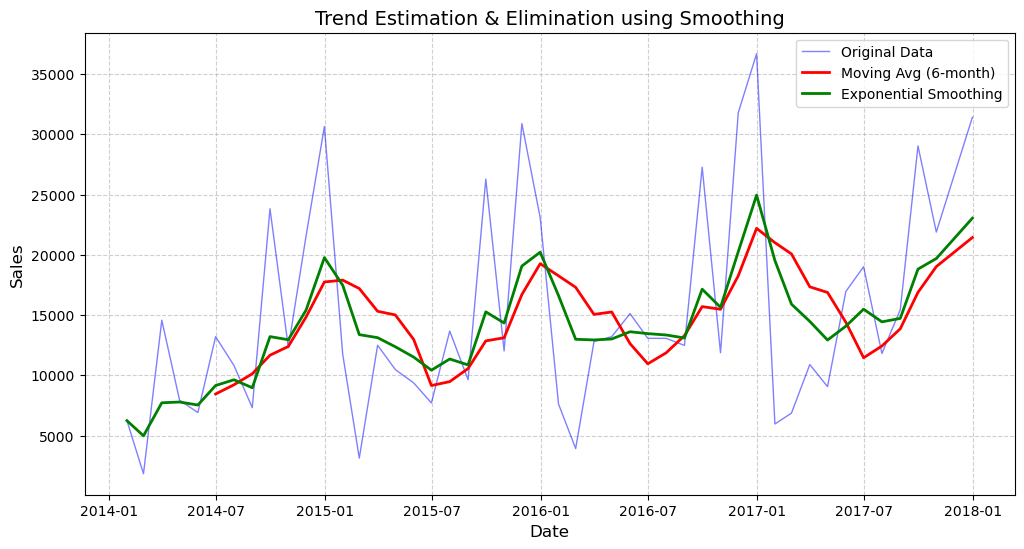

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (update the file path if needed)
df = pd.read_csv(r"C:\Users\LENOVO-RKC\OneDrive\Desktop\Super_Store_data.csv", encoding="latin1")

# Clean column names
df.columns = df.columns.str.strip()

# Convert 'Order Date' to datetime and set as index
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.set_index('Order Date', inplace=True)

# Convert 'Sales' to numeric
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Aggregate data at a monthly level
df_monthly = df['Sales'].resample('M').sum()

# Remove extreme outliers (top 1%)
df_monthly = df_monthly[df_monthly < df_monthly.quantile(0.99)]

# Apply smoothing techniques
df_monthly = df_monthly.to_frame()  # Convert series to DataFrame
df_monthly['Moving_Avg'] = df_monthly['Sales'].rolling(window=6).mean()  # 6-month rolling avg
df_monthly['Exp_Smooth'] = df_monthly['Sales'].ewm(span=6, adjust=False).mean()  # Exponential smoothing

# Plot cleaned data
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['Sales'], label="Original Data", color='blue', alpha=0.5, linewidth=1)
plt.plot(df_monthly['Moving_Avg'], label="Moving Avg (6-month)", color='red', linewidth=2)
plt.plot(df_monthly['Exp_Smooth'], label="Exponential Smoothing", color='green', linewidth=2)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.title("Trend Estimation & Elimination using Smoothing", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
